<a href="https://colab.research.google.com/github/tillaczel/Machine-learning-workshop/blob/resturcture/Numpy_neural_network_implementation/Numpy_XOR_classification_exercise_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR classification
Build a neural network, which can classify the XOR data. The classifier should be a logistic regression with a treshold of 0.5. Use MSE for the loss function. Complete the code in the 'TASK: defining the neural network' section.


## Importing libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Defineing visualization

In [0]:
def vis(X,Y,title):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.title(title)
    plt.show()

## TASK: Defineing the neural network

In [0]:
class network():

    def __init__(self, learning_rate, hidden_size):
        self.learning_rate = learning_rate

        self.w1 = np.random.randn(hidden_size, 2)
        self.w2 = np.random.randn(1, hidden_size)
        self.b1 = np.random.randn(1, hidden_size)
        self.b2 = np.random.randn(1, 1)

    def predict(self,X):
        z1 = np.transpose(np.dot(self.w1, np.transpose(X)))+self.b1
        g1 = 1/(1+np.exp(-z1))
        z2 = np.transpose(np.dot(self.w2, np.transpose(g1)))+self.b2
        g2 = 1/(1+np.exp(-z2))
        return g2

    def train(self,X,Y,epoch):
        for e in range(epoch):           
            z1 = np.transpose(np.dot(self.w1, np.transpose(X)))+self.b1
            g1 = 1/(1+np.exp(-z1))
            z2 = np.transpose(np.dot(self.w2, np.transpose(g1)))+self.b2
            g2 = 1/(1+np.exp(-z2))

            if e % 100 == 0:
                print(f'Epoch: {e}, error: {np.mean((g2-Y[:, np.newaxis])**2)}')
            
            dg2 = g2-Y[:, np.newaxis]
            dz2 = np.multiply(dg2, np.multiply(g2, (1-g2)))
            dw2 = np.transpose(np.dot(np.transpose(g1), dz2)/g1.shape[0])
            db2 = np.mean(dz2)
            
            dg1 = dz2*self.w2
            dz1 = np.multiply(dg1, np.multiply(g1, (1-g1)))
            dw1 = np.transpose(np.dot(np.transpose(X), dz1)/X.shape[0])
            db1 = np.mean(dz1)

            self.w1 += -learning_rate*dw1
            self.w2 += -learning_rate*dw2
            self.b1 += -learning_rate*db1
            self.b2 += -learning_rate*db2

## Training the model

In [0]:
learning_rate = 0.1
hidden_size = 20
model = network(learning_rate, hidden_size)

Creating the data and saving the prediction of the initialized model.

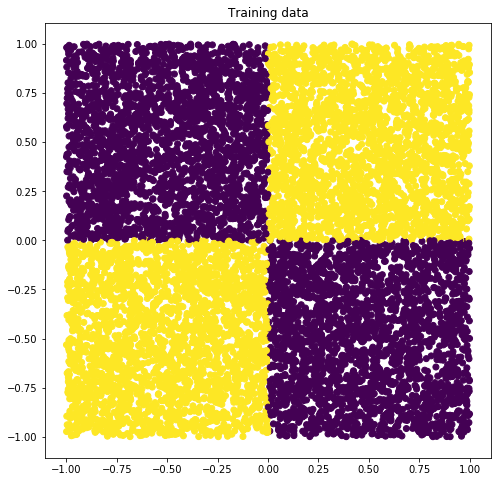

In [0]:
X = np.random.rand(10000,2)*2-1
Y = np.clip(X[:,0]*X[:,1]*np.inf,0,1)
vis(X, Y, 'Training data')
old_model_prediction = model.predict(X)

Training the network and visualizing the resutls

Epoch: 0, error: 0.49894830825249054
Epoch: 100, error: 0.49565214990341855
Epoch: 200, error: 0.488753771296994
Epoch: 300, error: 0.46756308223481263
Epoch: 400, error: 0.33971423786371335
Epoch: 500, error: 0.255571496225048
Epoch: 600, error: 0.2489507205840186
Epoch: 700, error: 0.2448100483076792
Epoch: 800, error: 0.24215229308502356
Epoch: 900, error: 0.24034010889737292
Epoch: 1000, error: 0.23897652511533346
Epoch: 1100, error: 0.23783867039867518
Epoch: 1200, error: 0.2368070909109721
Epoch: 1300, error: 0.235818861488714
Epoch: 1400, error: 0.2348408447967081
Epoch: 1500, error: 0.23385536998920156
Epoch: 1600, error: 0.23285277349807934
Epoch: 1700, error: 0.231827560714539
Epoch: 1800, error: 0.23077643987821234
Epoch: 1900, error: 0.22969731584572356
Epoch: 2000, error: 0.22858877477038672
Epoch: 2100, error: 0.22744982005448938
Epoch: 2200, error: 0.22627973724998146
Epoch: 2300, error: 0.22507802532526267
Epoch: 2400, error: 0.22384436211433326
Epoch: 2500, error: 0.22

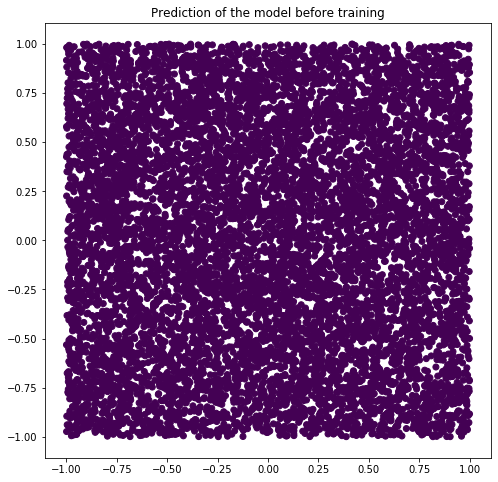

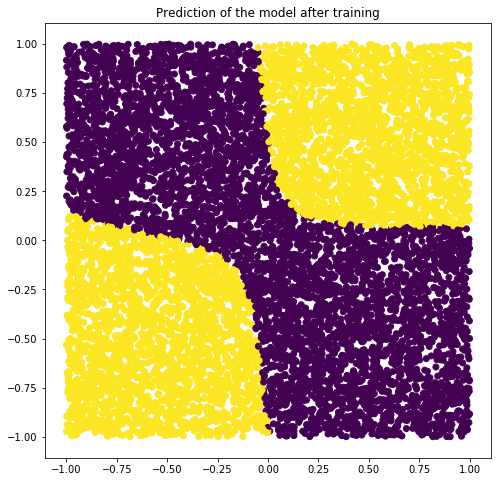

In [0]:
model.train(X,Y,10000)
vis(X, np.round(old_model_prediction[:,0]), 'Prediction of the model before training')
vis(X, np.round(model.predict(X)[:,0]), 'Prediction of the model after training')